In [1]:
import pandas as pd
import numpy as np
from PIL import Image, ExifTags, ImageOps

import os
from dotenv import load_dotenv

SUPPORTED_EXTENSIONS = ["jpg", "jpeg", "png", "pdf", "JPG", "PNG", "PDF", "JPEG"]
load_dotenv()

True

In [2]:
df = pd.read_csv("ocr_requests.csv")
text_table = pd.read_csv("ocr_texts.csv")

In [3]:
df.shape

(30000, 3)

In [3]:
df["ocr_text"] = [eval(row["ocr_text"]) for _ , row in text_table.iterrows() if (row["id"] == r["id"].item() for _ , r in df.iterrows())]
df.head()

,id,file_hash,url,ocr_text
0,1,6e8c1764f08f3c16827038b5285b660e,uploads/PDExa9eJCgQdeqbKkSwfnAkcnEHLHCVrf8Eh58...,SUN KEE SEAFOOD\n新記海鮮\nSTALL F-40 G/F. SHEUNG ...
1,2,726eee69671fe29c5abc27a5ea8e1dc9,uploads/IDMI8umbpzl7JAoMperIn2Vwjk76pdn4Fu1Uf9...,"GreenLand\n8 Fung Mat Road, Western Wholeslae ..."
2,3,726eee69671fe29c5abc27a5ea8e1dc9,uploads/yrjxPY99mFviOc68WeQZsH0c7h76sMdv6RH2Fj...,"GreenLand\n8 Fung Mat Road, Western Wholeslae ..."
3,4,726eee69671fe29c5abc27a5ea8e1dc9,uploads/RKbhfp9xNRRUxolg6AwzT9s5wCHfVXb39lbxeY...,"GreenLand\n8 Fung Mat Road, Western Wholeslae ..."
4,5,726eee69671fe29c5abc27a5ea8e1dc9,uploads/RAQc9f1nS1m5qk6kp6pd8Cs4Hc0Wl7r5Jkr6nX...,"GreenLand\n8 Fung Mat Road, Western Wholeslae ..."


In [5]:
df.drop_duplicates(subset=["file_hash"], inplace=True)
df.shape

(26271, 4)

In [6]:
df["extension"] = df["url"].apply(lambda row: row.split(".")[-1])

In [7]:
df["extension"].unique()

array(['jpg', 'jpeg', 'png', 'pdf', 'JPG', 'PNG', 'PDF', 'JPEG', 'jfif'],
      dtype=object)

In [8]:
from utils import download_file

[2023/10/10 18:39:20] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/abdo/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/abdo/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_d

In [9]:
jpeg = df[df["extension"] == "jpeg"].sample()
img_cloud_path = jpeg["url"].item()
url = os.environ["BASE_URL"] + f"/{img_cloud_path}"
img_path = download_file(url, f"{jpeg['id'].item()}.{jpeg['extension'].item()}")
img_path

PosixPath('data/12901.jpeg')

(1248, 2001)


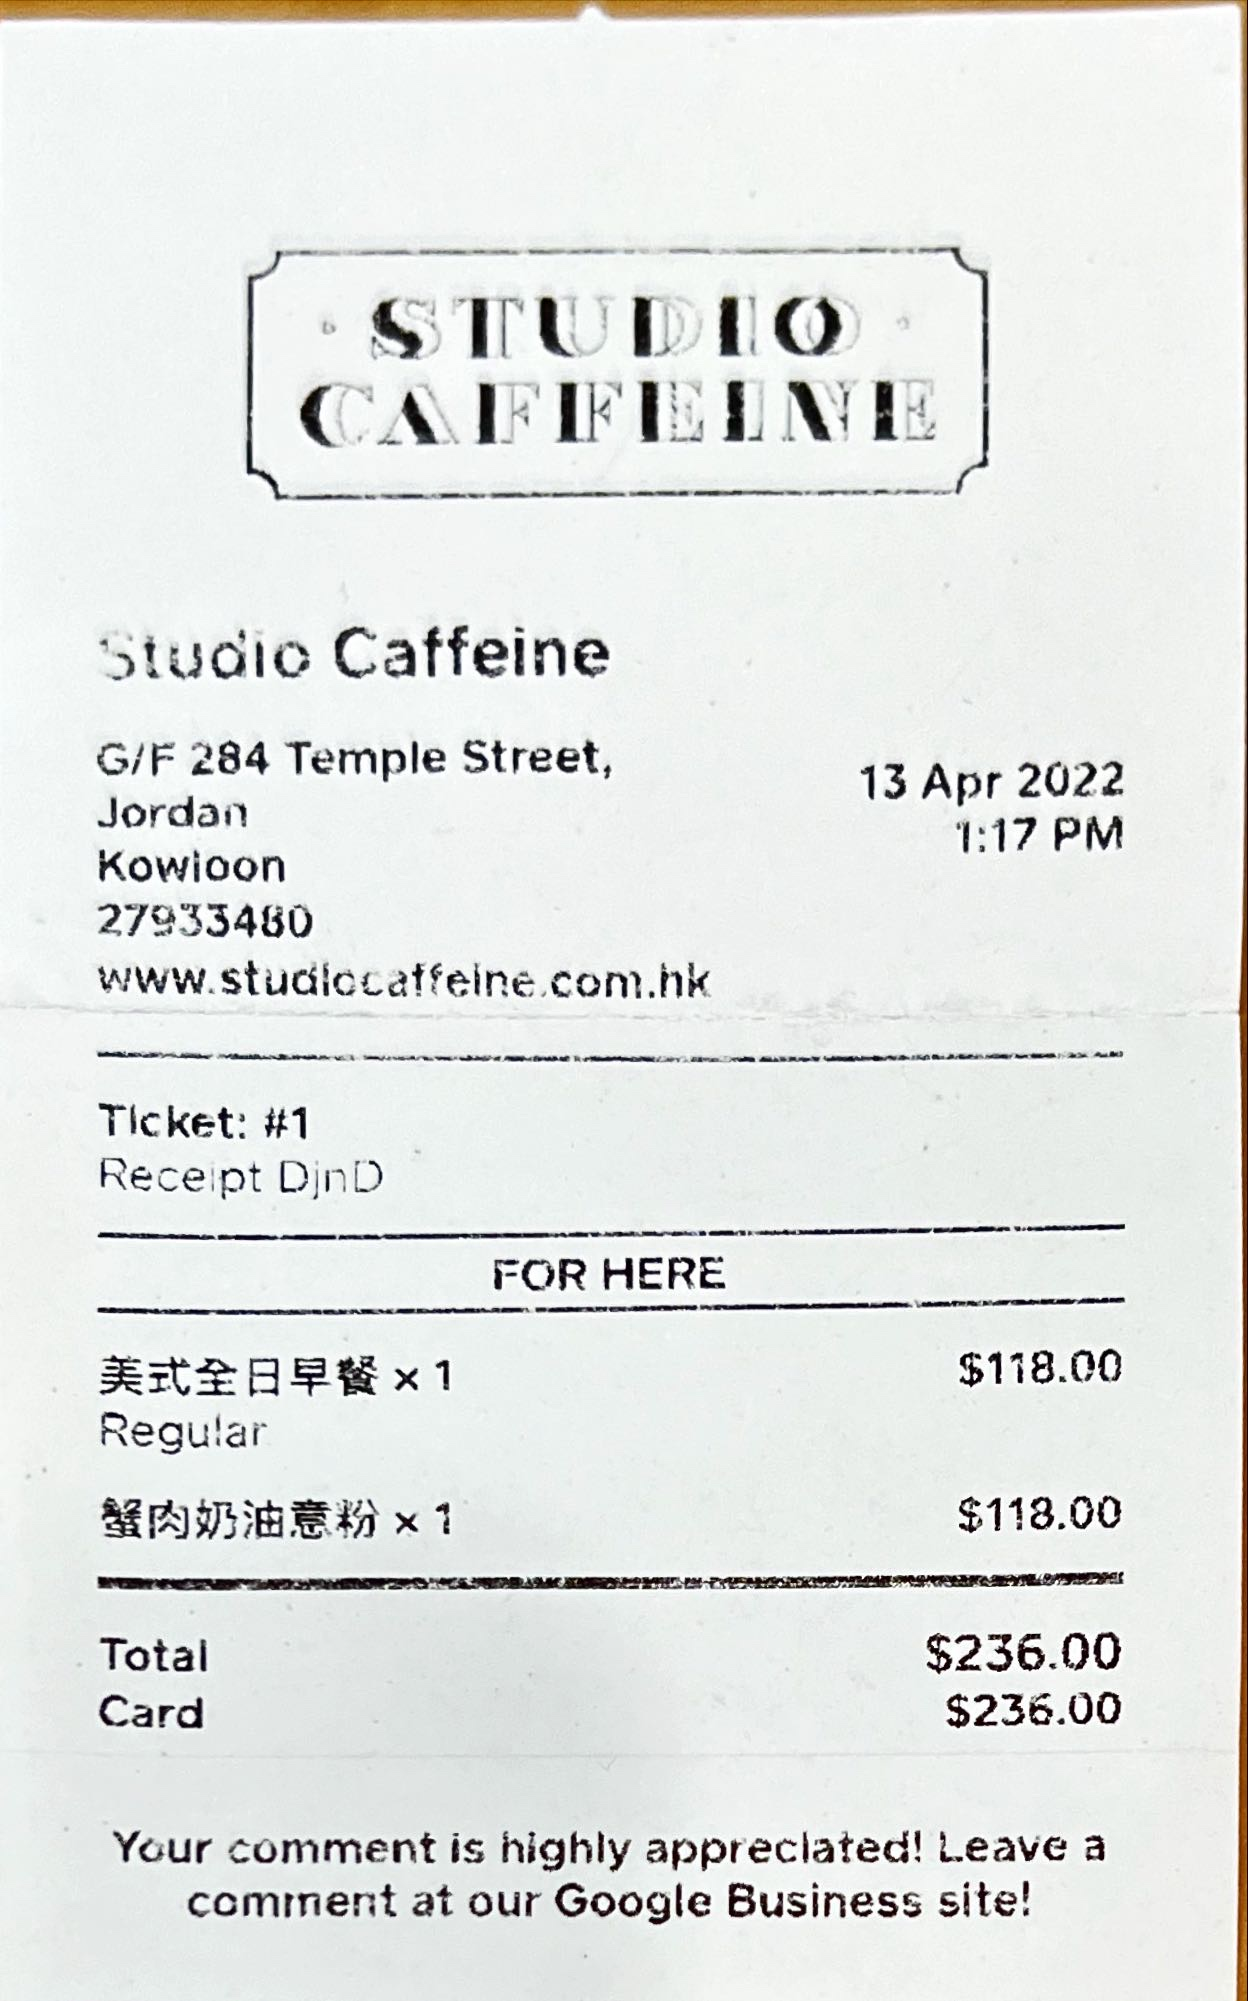

In [10]:
img = Image.open(img_path)
print(img.size)
img

Size: (624, 1000)
Height: 1000
Width: 624
Image info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (72, 72), 'exif': b'Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x02\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00&\x00\x00\x00\x00\x00\x03\xa0\x01\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x04\xe0\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x07\xd1\x00\x00\x00\x00', 'dpi': (72, 72)}


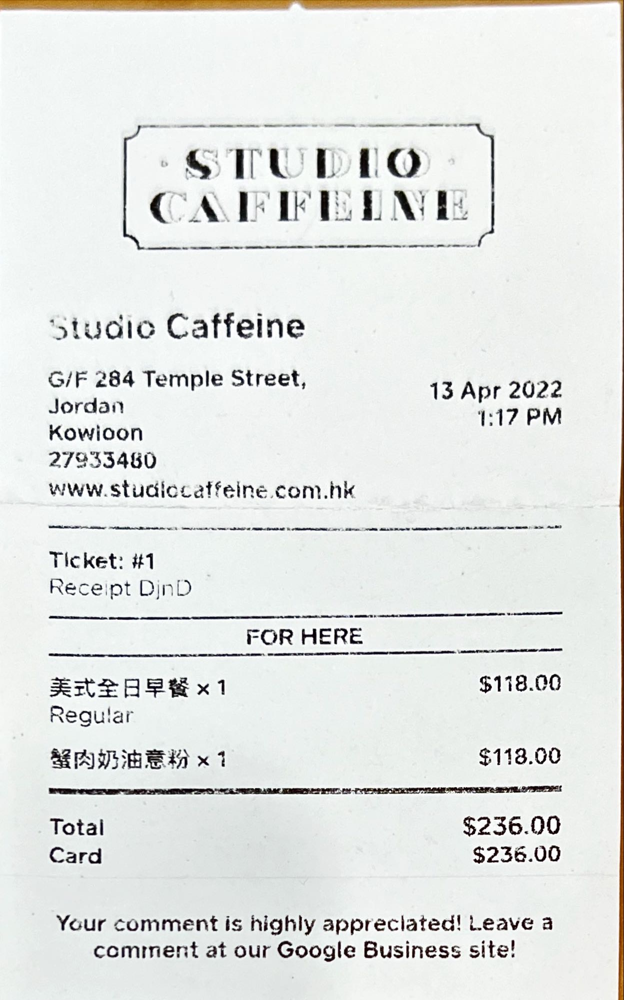

In [11]:
img.thumbnail((1000, 1000))
img = ImageOps.exif_transpose(img)
print(f"Size: {img.size}")
print(f"Height: {img.height}")
print(f"Width: {img.width}")
print(f"Image info: {img.info}")
img

In [12]:
from paddleocr import PaddleOCR

ocr = PaddleOCR(use_angle_cls=True, lang="ch")

[2023/10/10 18:39:23] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/abdo/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/abdo/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_d

In [13]:
df.shape[0]

26271

In [14]:
df["manual_edit"] = np.full(shape=df.shape[0], fill_value=False, dtype=bool)

In [15]:
results = ocr.ocr(np.asarray(img), det=False, rec=False, cls=True)
orientation, conf = results[0][0]
orientation = int(orientation)
orientation, conf

(0, 0.52644056)

In [18]:
img_dir = {"image": None, "ground_truth": None, "image_path": None, "rotated": None, "manual_edit": None}
if conf < 0.8:
    img_dir["manual_edit"] = True
    img_dir["rotated"] = False
else:
    if orientation != 0:
        img.rotate(orientation, expand=True)
        img_dir["rotated"] = True
    else:
        img_dir["rotated"] = False
    img_dir["manual_edit"] = False
img.save(img_path)
img_dir["image"] = img
img_dir["ground_truth"] = {"gt_parse": {"text_sequence": jpeg["ocr_text"].item()}}
img_dir["image_path"] = img_path

In [17]:
img_dir

{'image': <PIL.Image.Image image mode=RGB size=624x1000>,
 'ground_truth': {'gt_parse': {'text_sequence': '"STUDIO\\nCAFFEINE\\n\\nStudio Caffeine\\nG/F 284 Temple Street,\\nJordan\\t\\t13 Apr 2022\\n\\t1:17 PM\\nKowloon\\n27933480\\nwww.studiocaffeine.com.hk\\n\\nTicket: #1\\nReceipt DjnD\\n\\nFOR HERE\\n美式全日早餐x1\\t\\t$118.00\\nRegular\\n蟹肉奶油意粉x1\\t\\t$118.00\\n\\nTotal\\t\\t$236.00\\nCard\\t\\t$236.00\\n\\nYour comment is highly appreciated! Leave a\\ncomment at our Google Business site!"'}},
 'image_path': PosixPath('data/12901.jpeg'),
 'rotated': False,
 'manual_edit': True}